In [12]:
from glob import glob
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread

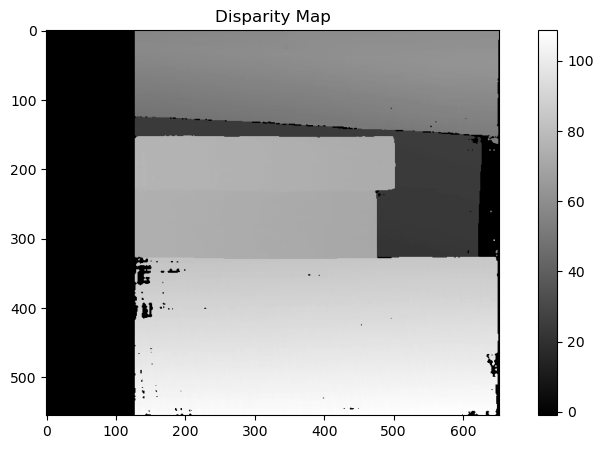

In [6]:
# 读取左图和右图
img_left = cv2.imread('./imgs/left.png', cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread('./imgs/right.png', cv2.IMREAD_GRAYSCALE)

# 检查图像是否成功加载
if img_left is None or img_right is None:
    print("Error: 图像加载失败")
    exit()

# 创建SGBM对象
min_disparity = 0
num_disparities = 16 * 8  # 必须是16的倍数
block_size = 3  # 块大小，必须是奇数

stereo = cv2.StereoSGBM_create(
    minDisparity=min_disparity,
    numDisparities=num_disparities,
    blockSize=block_size,
    P1=8 * 3 * block_size ** 2,
    P2=32 * 3 * block_size ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=15,
    speckleWindowSize=0,
    speckleRange=2,
    preFilterCap=63,
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
)

# 计算视差图
disparity = stereo.compute(img_left, img_right).astype(np.float32) / 16.0

cv2.imwrite("result.jpg", disparity)
# 可视化视差图
plt.figure(figsize=(10, 5))
plt.imshow(disparity, cmap='gray')
plt.colorbar()
plt.title('Disparity Map')
plt.show()

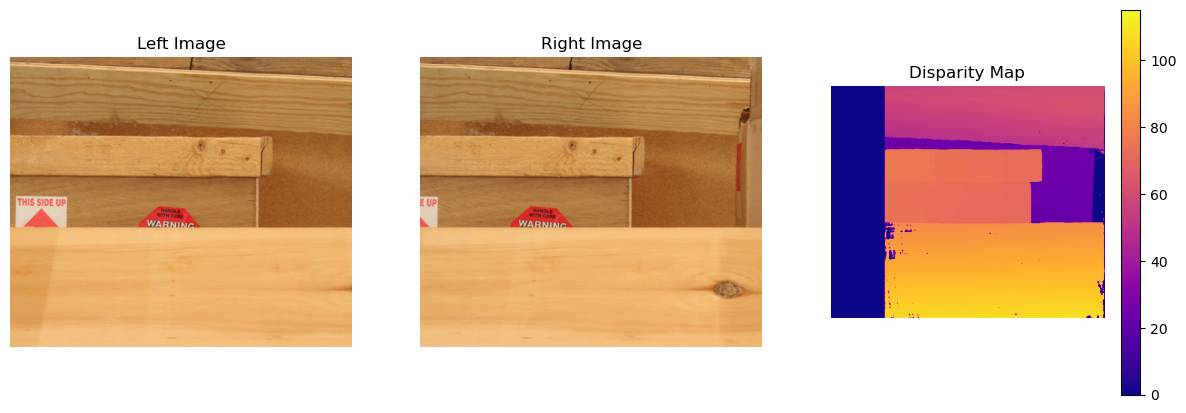

In [16]:

img_left = imread('./imgs/left.png')
img_right = imread('./imgs/right.png')
result = imread('result.jpg')


# 设置图像显示
plt.figure(figsize=(15, 5))

# 显示左图
plt.subplot(1, 3, 1)
plt.imshow(img_left, cmap='gray')
plt.title('Left Image')
plt.axis('off')

# 显示右图
plt.subplot(1, 3, 2)
plt.imshow(img_right, cmap='gray')
plt.title('Right Image')
plt.axis('off')

# 显示视差图
plt.subplot(1, 3, 3)
plt.imshow(result, cmap='plasma')
plt.title('Disparity Map')
plt.colorbar()
plt.axis('off')

# 展示图像
plt.show()